In [210]:
%pip install ucimlrepo
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


In [211]:
import pandas as pd
from ucimlrepo import fetch_ucirepo 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc, roc_auc_score,classification_report, confusion_matrix, RocCurveDisplay,ConfusionMatrixDisplay 
import seaborn as sns


In [212]:
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 
  
# metadata 
print(adult.metadata) 
  
# variable information 
print(adult.variables) 


{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

# General layout

In [213]:
X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [214]:
X.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [215]:
# Head and tail didn't provide different values of income so I tried random indcies
y[50:60]

,income
50,<=50K
51,<=50K
52,>50K
53,>50K
54,<=50K
55,>50K
56,<=50K
57,<=50K
58,<=50K
59,<=50K


In [216]:
y.describe()

,income
count,48842
unique,4
top,<=50K
freq,24720


# Data Cleaning

## NULL values

In [217]:
(X.isnull()).sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
dtype: int64

In [218]:
# NULL values
for i in X.columns:
    print(f"{i}: {len(X.loc[X[i] == '?',i])}", end='\n')

age: 0
workclass: 1836
fnlwgt: 0
education: 0
education-num: 0
marital-status: 0
occupation: 1843
relationship: 0
race: 0
sex: 0
capital-gain: 0
capital-loss: 0
hours-per-week: 0
native-country: 583


In [219]:
X.replace('?', np.nan, inplace=True)

C:\Users\Yousef\AppData\Local\Temp\ipykernel_11092\2018571216.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace('?', np.nan, inplace=True)


In [220]:
for i in X.columns:
    print(f"{i}: {len(X.loc[X[i] == '?',i])}", end='\n')

age: 0
workclass: 0
fnlwgt: 0
education: 0
education-num: 0
marital-status: 0
occupation: 0
relationship: 0
race: 0
sex: 0
capital-gain: 0
capital-loss: 0
hours-per-week: 0
native-country: 0


In [221]:
(X.isnull()).sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
dtype: int64

I've decided to drop these values for now<br>
Considering our domain it's hard to try to get the country of someone which is null or his working class using 
common techniques like imputing or bfill or ffill 

In [222]:
# Drop rows with missing values
X.dropna(axis = 0,inplace=True)
X

C:\Users\Yousef\AppData\Local\Temp\ipykernel_11092\2509150595.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(axis = 0,inplace=True)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States


In [223]:
(X.isnull()).sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
dtype: int64

In [224]:
sum(y['income'].isnull())

0

In [225]:
y['income'].unique()

array(['<=50K', '>50K', '<=50K.', '>50K.'], dtype=object)

In [226]:
y.loc[y['income'] == '>50K.', 'income' ] = '>50K'
y.loc[y['income'] == '<=50K.', 'income'] = '<=50K'
# copy for graphing
Y = y.copy(deep=True)
y.loc[y['income'] == '>50K',  'income' ] = 1
y.loc[y['income'] == '<=50K',  'income'] = 0
y = y.astype('Int8')

C:\Users\Yousef\AppData\Local\Temp\ipykernel_11092\159908506.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.loc[y['income'] == '>50K.', 'income' ] = '>50K'
C:\Users\Yousef\AppData\Local\Temp\ipykernel_11092\159908506.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.loc[y['income'] == '<=50K.', 'income'] = '<=50K'
C:\Users\Yousef\AppData\Local\Temp\ipykernel_11092\159908506.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

## Checking for duplicates

In [227]:
print(sum(X.duplicated()))
X.drop_duplicates(inplace=True)
print(sum(X.duplicated()))

52
0


C:\Users\Yousef\AppData\Local\Temp\ipykernel_11092\34106616.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop_duplicates(inplace=True)


In [228]:
X
df = X[:]
df['income'] = y[:]
df.to_csv("adult.csv")

C:\Users\Yousef\AppData\Local\Temp\ipykernel_11092\1956787655.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['income'] = y[:]


# Plotting

In [229]:
sns.set_style("whitegrid")

<Axes: xlabel='income', ylabel='income'>

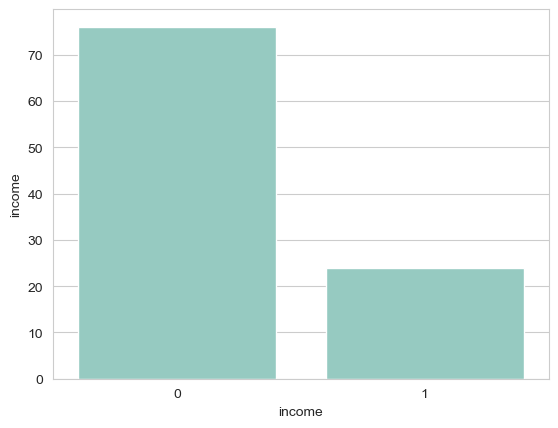

In [230]:
sns.barplot(x='income', y='income', data=y,estimator=lambda x: (len(x)/len(y)*100))

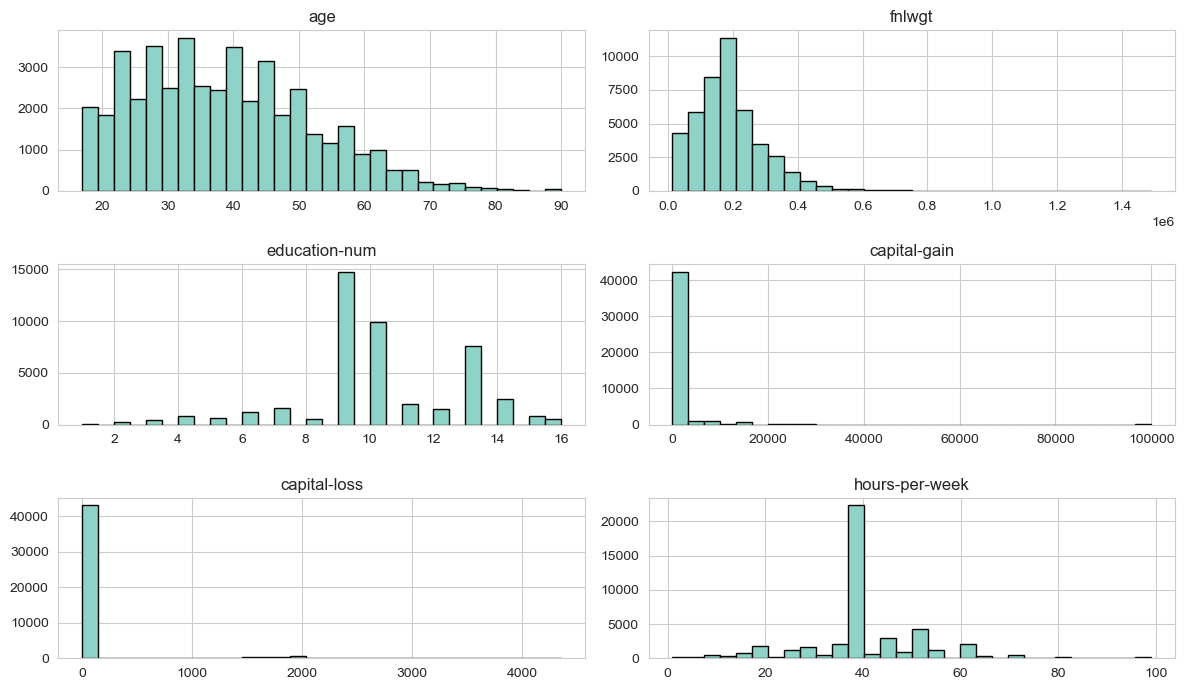

In [231]:
X.hist(figsize=(12,7),bins=30,edgecolor ='black')
plt.tight_layout()
plt.show()

In [232]:
df_copy = df.copy(deep=True)
df_copy['income'] = Y

In [233]:
# Extracting catgorical columns
categorical_col = X.select_dtypes(include=['object']).columns.to_list()
categorical_col

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

In [234]:
def age_group(x):
    x = int(x)
    x = abs(x)
    if(x < 31 ):
        return "<=30"
    if( 30 < x < 41 ):
        return "31-40"
    if( 40 < x < 51 ):
        return "41-50"
    if( 50 < x < 61 ):
        return "51-60"
    if( 60 < x < 71 ):
        return "61-70"
    else:
        return "Greater than 70"

df_copy['age_group'] = df_copy['age'].apply(age_group)

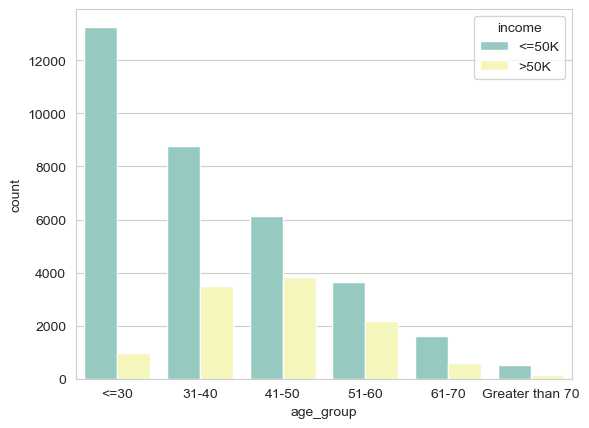

In [235]:
sns.countplot(data = df_copy, x = 'age_group', hue= 'income',order=['<=30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70'])
plt.show()


In [236]:
counts = df_copy['native-country'].value_counts()
mask = df_copy['native-country'].map(counts) < 130
df_copy.loc[mask, 'native-country'] = 'other'

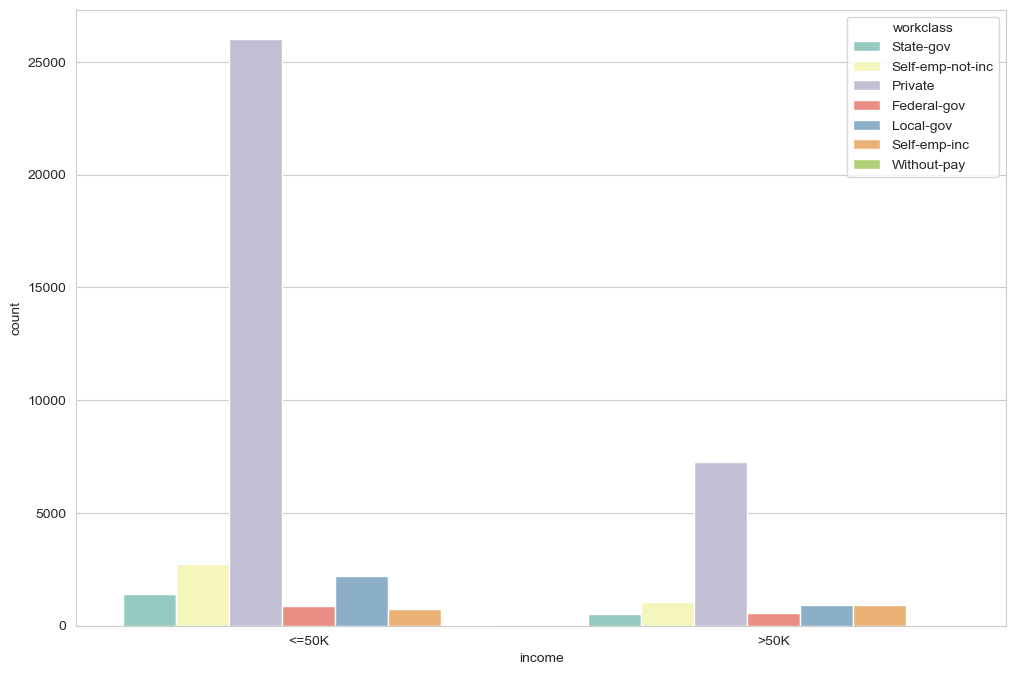

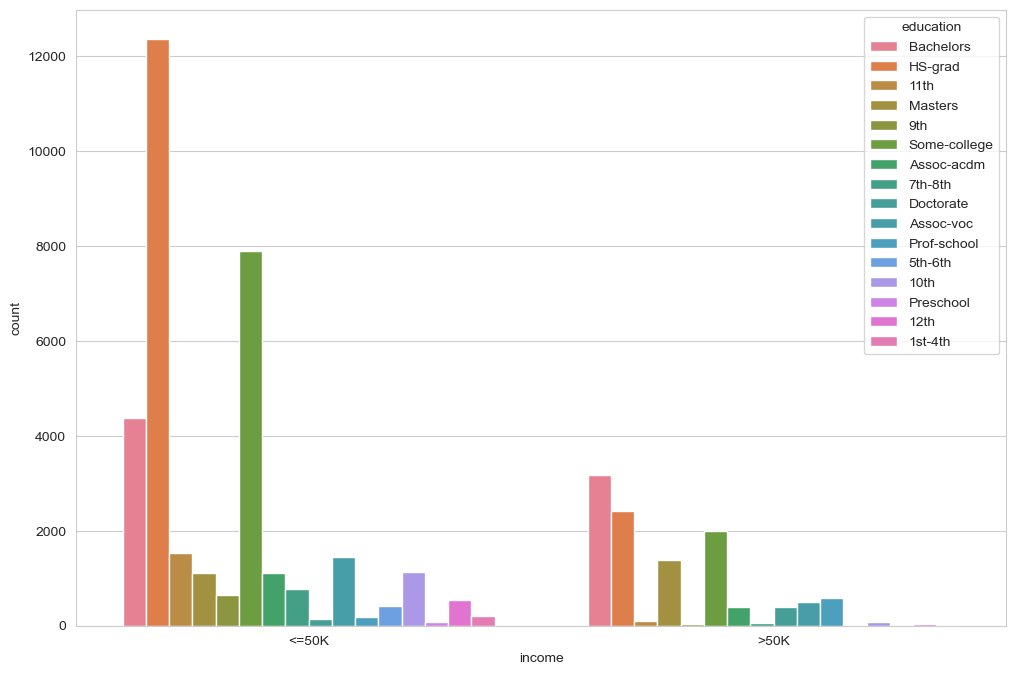

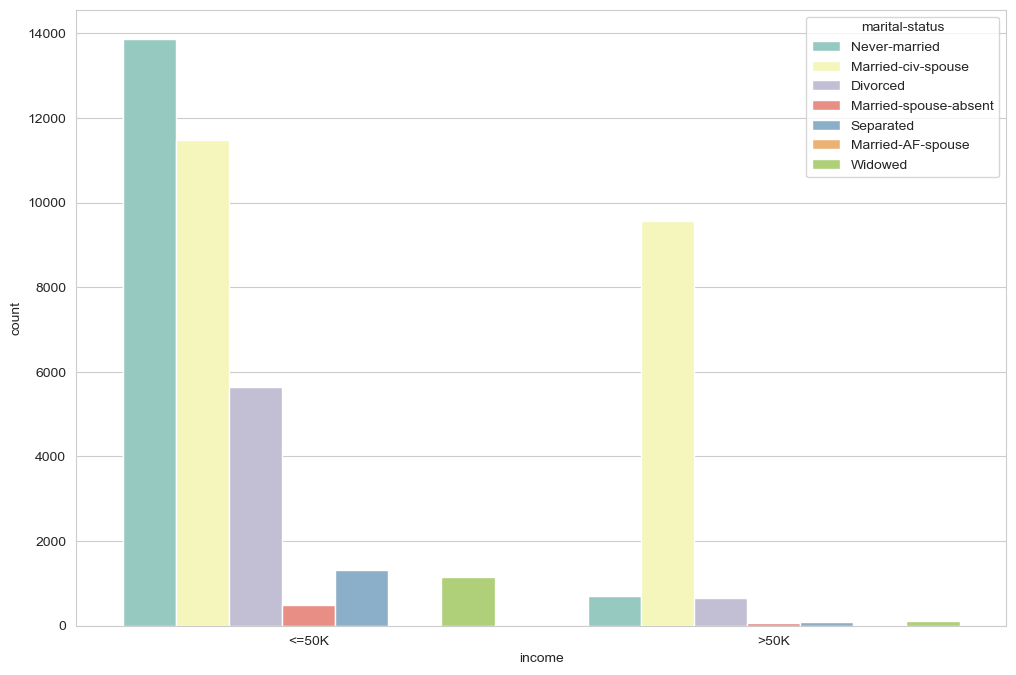

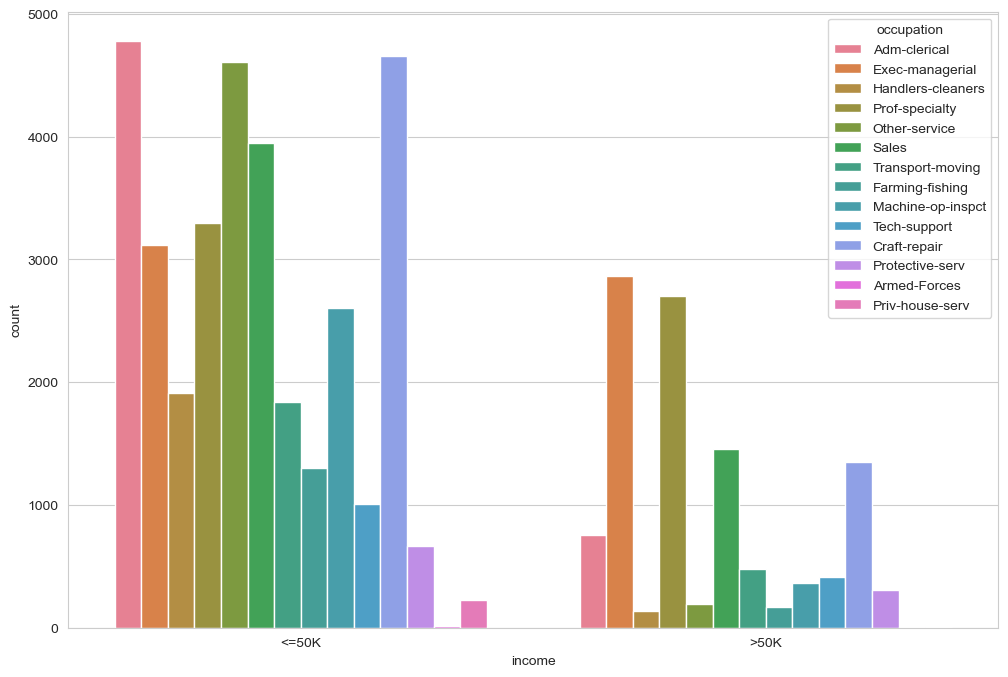

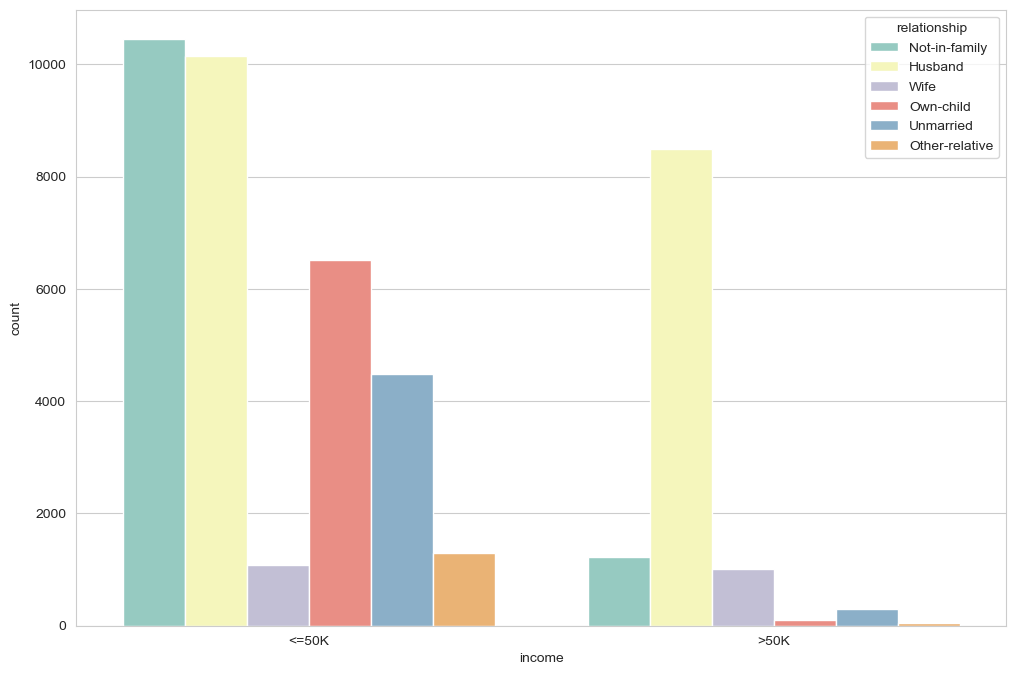

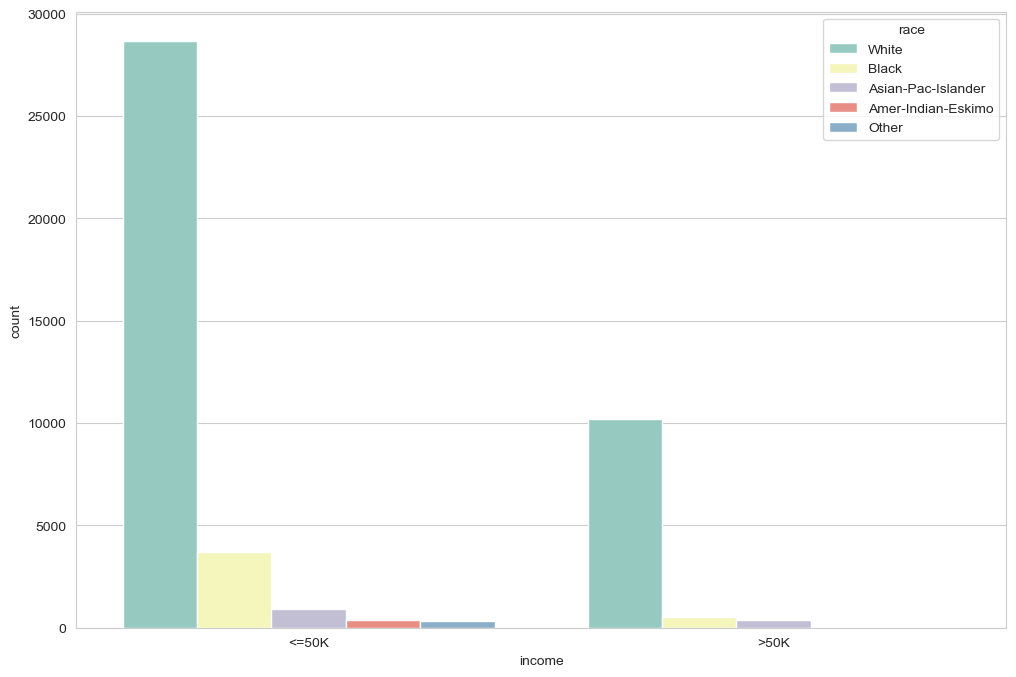

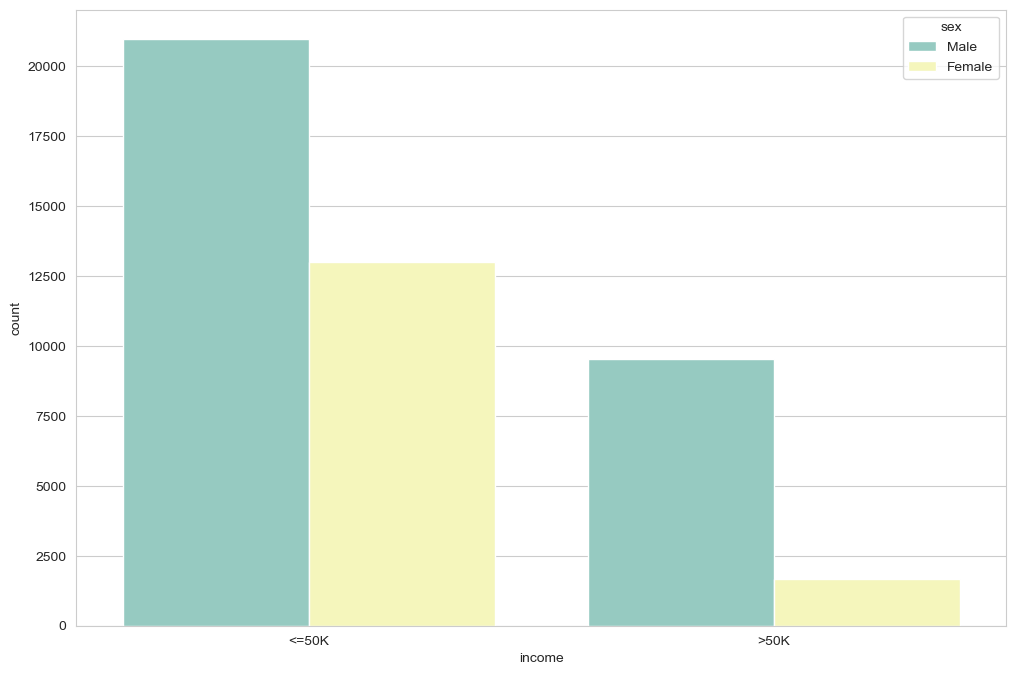

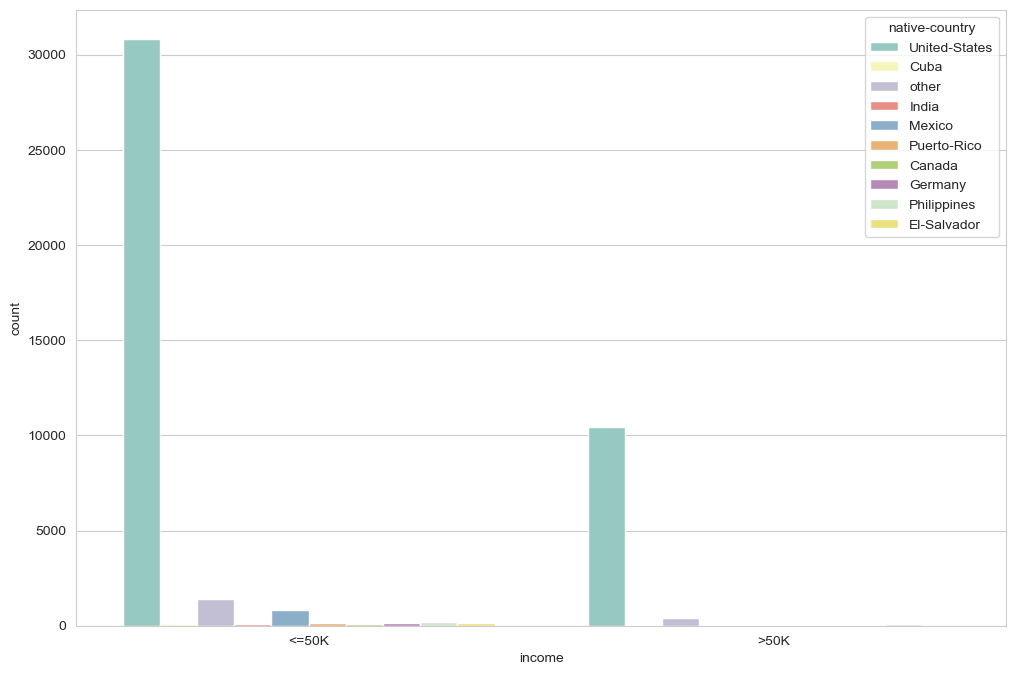

In [237]:
for i in categorical_col:
    plt.figure(figsize=(12,8))
    sns.countplot(data = df_copy, x = 'income', hue= f'{i}')
    plt.show()